## Covariance
Covariance is a measure of the relationship between two random variables. It measures how two random random variables vary together.

Covariance is a quantitative measure of the degree to which the deviation of one variable (X) from its mean is related to the deviation of another variable (Y) from its mean.

##### Covariance measures the joint variability of two random variables.

Unlike Variance, which is non-negative, Covariance can be negative or positive (or zero, of course). A positive value of Covariance means that two random variables tend to vary in the same direction, a negative value means that they vary in opposite directions, and a 0 means that they don’t vary together.

***Covariance values can vary from -∞ to +∞.***

***Formula:***

$Cov_{x,y}=\frac{\Sigma{(x_i-\overline{x})}{(y_i-\overline{y})}}{N-1}$

***Types of Covariance:***

There are mainly two types of Covariance: Positive and negative covariance.

*Positive Covariance:*
Positive covariance means both the variables (X, Y) move in the same direction (i.e. show similar behavior).

*Negative Covariance:*
Negative covariance means both the variables (X, Y) move in the opposite direction.

**How to understand and interpret the values of Covariance**: If Covariance is 0 means no relationship between two variables. Covariance can tell you when two things vary together (Covariance is positive).



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
data=datasets.load_iris()
data=pd.DataFrame(data.data, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)',
'petal width (cm)'])

In [2]:
import pandas as pd
def mean_impl(data):
    data=np.asarray(data)
    s=data.sum()/len(data)
    return s
mean_impl(data.iloc[:,0:1])

5.843333333333334

In [3]:
def covariance_implmentation(data):
    size=data.shape[1]
    a=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    if(size==2):
        b=(np.asarray(data.iloc[:,1:2])-mean_impl(data.iloc[:,1:2]))
    else:
        b=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    p=((a*b).sum())
    return p/(data.shape[0]-1)
covariance_implmentation(data.iloc[:,0:2])

-0.04243400447427292

### Covariance Matrix for all features of dataset

The covariance matrix is also known as the variance-covariance matrix, as the diagonal values of the covariance matrix show variances and the other values are the covariances.

The covariance matrix is a square matrix which can be written as follows:

$C=\frac{\Sigma_{i=1}^{n}(X_i-\overline{X})(X_i-\overline{X})^T}{N-1}$



In [4]:
def Covariance_matrix(data):
    result=[]
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            result.append(covariance_implmentation(data.iloc[:,[i,j]]))
    print(np.asarray(result).reshape(data.shape[1],data.shape[1]))
Covariance_matrix(data)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


## Correlation
Covariance tells us about the direction of relationship but **Correlation** tells us both the strength and the direction of this relationship. Correlation helps us to determine whether or not, and how strongly, changes in various variables relate to each other.

**The most important part of Correlation is that it is bounded between -1 and 1. -1 and 1 are known as perfact Correlation.**

***Types of Correlation:***

Correlation is commonly classified into **negative** and **positive correlation**.

***Positive correlation:***

The correlation is said to be positive when the variables move together in the same direction. When the income rises, consumption also rises.

***Negative correlation:***

The correlation is negative when they move in opposite directions. When the price of apples falls its demand increases.

Note: If Correlation is 0 means no relationship between two variables.

***TECHNIQUES FOR MEASURING CORRELATION:***

1. **Scatter Diagram**: A scatter diagram is a useful technique for visually examining the form of relationship, without calculating any numerical value.
2. **Karl Pearson’s Coefficient of Correlation**: This is also known as product moment correlation coefficient or simple correlation coefficient. It gives a precise numerical value of the degree of linear relationship between two variables X and Y. It is important to note that **Karl Pearson’s coefficient of correlation should be used only when there is a linear relation between the variables**.
3. **Spearman’s rank correlation**:  -	Spearman’s rank correlation coefficient can be used in some cases where **there is a relation whose direction is clear but which is nonlinear**.

***Note***

Spearman’s correlation coefficient is not affected by extreme values. In this respect, it is better than Karl Pearson’s correlation coefficient.

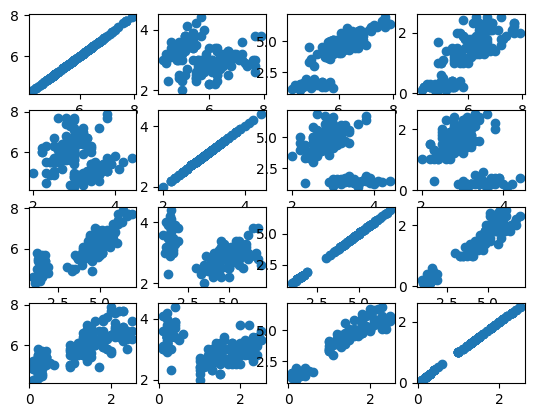

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def scatterplot_impl(data):
    p=1
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            plt.subplot(data.shape[1],data.shape[1],p)
            plt.scatter(data.iloc[:,i], data.iloc[:,j])
            p+=1

scatterplot_impl(data)

### Karl Pearson’s Coefficient of Correlation
***formula:***

$r=\frac{\Sigma{(X-\overline{X})(Y-\overline{Y})}}{\sqrt{\Sigma(X-\overline{X})^2}\sqrt{\Sigma(Y-\overline{Y})^2}}$


In [6]:
#standard deviation
def std_dev(data):
    a=mean_impl(data)
    res=np.sqrt(((np.asarray(data)-a)*(np.asarray(data)-a)).sum())
    return res
def Pearson_Corr_Impl(data):
    size=data.shape[1]
    a=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    b=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    p=((a*b).sum())/(std_dev(data.iloc[:,0:1])*std_dev(data.iloc[:,0:1]))
    if(size==2):
        b=(np.asarray(data.iloc[:,1:2])-mean_impl(data.iloc[:,1:2]))
        p=((a*b).sum())/(std_dev(data.iloc[:,0:1])*std_dev(data.iloc[:,1:2]))

    return p
Pearson_Corr_Impl(data.iloc[:,1:3])

-0.42844010433053975

### Spearman’s rank correlation
***Formula:***

$\rho=1-\frac{6*[\Sigma{D_i^2}+\frac{(m_1^3-m_1)}{12}+\frac{(m_2^3-m_2)}{12}+...]}{n(n^2-1)}$

where $m_1, m_2, ...$, are the number of repetitions of ranks. n is the number of observations and D the deviation of ranks assigned to a variable from those assigned to the other variable.


In [7]:
#Rank finding for data
from  collections import Counter
def Rank_finder(data):
    c=Counter(np.asarray(data.iloc[:,0:1]).flatten())
    p = sorted(c.items(), reverse=True)
    c1=np.sort(np.asarray(data.iloc[:,0:1]).flatten())[::-1]
    cnt=0
    lst=[]
    for i in p:
        a=(((i[1]+cnt)*(i[1]+cnt+1))/2 - (cnt*(cnt+1))/2)/i[1]
        cnt=cnt+i[1]
        for j in range(i[1]):
            lst.append(a)
    arrlst=np.asarray(lst)
    final=dict(np.unique(np.stack([c1,arrlst], axis=1),axis=0)[::-1])
    rank=[]
    c1=np.asarray(data.iloc[:,0:1]).flatten()
    for ele in c1:
        rank.append(final[ele])
    return rank
#Rank_finder(data)

In [8]:
#Spearman’s rank correlation
def Spearman_Rank_Corr(data):
    c1=Counter(np.asarray(data.iloc[:,0:1]).flatten())
    c2=Counter(np.asarray(data.iloc[:,1:2]).flatten())
    data_len=data.shape[0] #Size of dataset(total records)
    value=[]
    for i in dict(c1).values():
        value.append((i*(i*i-1))/12)
    for i in dict(c2).values():
        value.append((i*(i*i-1))/12)
    value=np.asarray(list(set(value))).sum()
    rank1=np.asarray(Rank_finder(data.iloc[:,0:1])) #Rank of first feature
    rank2=np.asarray(Rank_finder(data.iloc[:,1:2])) #Rank of second feature
    dist=rank1-rank2
    dist2=(dist*dist).sum()
    r=1-(6*(dist2+value))/(data_len*(data_len*data_len-1))
    return r
Spearman_Rank_Corr(data.iloc[:,[1,1]]) #takes input as dataframe with two features

0.9958318147473221

## Correlation Matrix

### What is a correlation matrix?
* We use correlation coefficients to determine the relationship between two variables. if we want to evaluate the correlation among multiple pairs of variables? Then we use a correlation matrix.

* A correlation matrix is essentially a table depicting the correlation coefficients for various variables.



In [9]:
def Correlation_matrix(data):
    result=[]
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            result.append(Pearson_Corr_Impl(data.iloc[:,[i,j]]))
    print(np.asarray(result).reshape(data.shape[1],data.shape[1]))
Correlation_matrix(data)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [10]:
def Correlation_matrix(data):
    result=[]
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            result.append(Spearman_Rank_Corr(data.iloc[:,[i,j]]))
    print(np.asarray(result).reshape(data.shape[1],data.shape[1]))
Correlation_matrix(data)

[[ 0.99955998 -0.164978    0.88136717  0.83061469]
 [-0.164978    0.99583181 -0.30690253 -0.28509534]
 [ 0.88136717 -0.30690253  0.99948976  0.93365661]
 [ 0.83061469 -0.28509534  0.93365661  0.99562647]]
